In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split

## Data Overview

In [2]:
dat = pd.read_pickle("data/reviews.pkl")

In [3]:
len(dat)

620193

In [4]:
dat = dat.sample(n=102000,
                random_state=271)

In [5]:
train, test = train_test_split(dat,
                               test_size=2000,
                               random_state=271)

In [6]:
print(len(dat),len(train),len(test))

102000 100000 2000


In [7]:
dat = train

In [8]:
dat.groupby("genre").count()["user_id"]/len(dat)

genre
fantasy    0.46529
history    0.27827
mystery    0.25644
Name: user_id, dtype: float64

Rating Distribution

In [9]:
dat.groupby("rating").count()["user_id"]/len(dat)

rating
0    0.02799
1    0.02697
2    0.07321
3    0.20490
4    0.34255
5    0.32438
Name: user_id, dtype: float64

<AxesSubplot:>

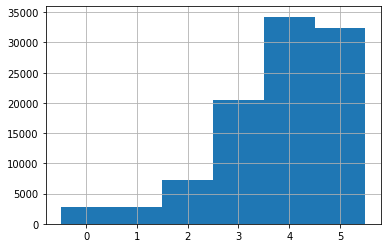

In [10]:
dat["rating"].hist(bins=np.arange(7)-0.5)

Number of Likes Distribution

In [11]:
dat["n_likes"].quantile([.25,.5,.75,.9,.95,.99])

0.25     0.0
0.50     0.0
0.75     1.0
0.90     3.0
0.95     6.0
0.99    24.0
Name: n_likes, dtype: float64

<AxesSubplot:>

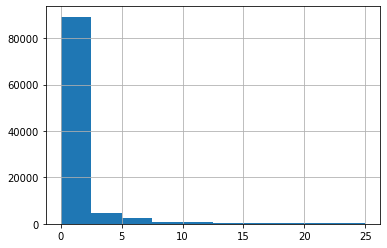

In [12]:
dat["n_likes"].hist(range=(0,25))

Frequently Occurring books/users

In [13]:
# most reviewed books in my sample
dat.groupby("book_id").count()["user_id"].sort_values()[::-1][:10]

book_id
22557272    183
19063       163
8442457     143
256683      141
41865       138
18007564    131
9361589     127
9460487     125
4667024     121
29056083    118
Name: user_id, dtype: int64

In [14]:
dat.groupby("book_id").count()["user_id"].quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01     1.0
0.05     1.0
0.10     1.0
0.25     1.0
0.50     1.0
0.75     1.0
0.90     3.0
0.95     5.0
0.99    14.0
Name: user_id, dtype: float64

In [15]:
# most-reviews-written users in my sample
dat.groupby("user_id").count()["book_id"].sort_values()[::-1][:10]

user_id
843a44e2499ba9362b47a089b0b0ce75    66
a45fb5d39a6a9857ff8362900790510a    64
fca26c34be8fe623ee340061f1281796    57
e5905d648022af7b1309d82a1f4d255b    46
795595616d3dbd81bd16b617c9a1fa48    44
f070f1cc66d79485f12f9a185afb9413    44
c5b70e45e230a166bb00201662495d69    41
60982541be85a0611e9634b4f63d0cb0    41
61ed555f078cd656a96e144906102169    39
b0ed09d14a462cb2d27327b87edf6f68    36
Name: book_id, dtype: int64

Review Length Distribution

In [16]:
dat["tokens"].apply(len).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01      2.0
0.05      5.0
0.10      8.0
0.25     16.0
0.50     36.0
0.75     86.0
0.90    171.0
0.95    240.0
0.99    423.0
Name: tokens, dtype: float64

<AxesSubplot:>

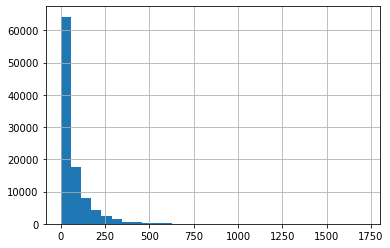

In [17]:
dat["tokens"].apply(len).hist(bins=30)

## Vocabulary Overview

In [18]:
# tokenize
tokens = [word for lst in dat["tokens"] for word in lst]
tokens_freq = nltk.FreqDist(tokens)

In [19]:
# vocab length
len(tokens_freq)

95345

In [20]:
# total words
sum(tokens_freq.values())

6872694

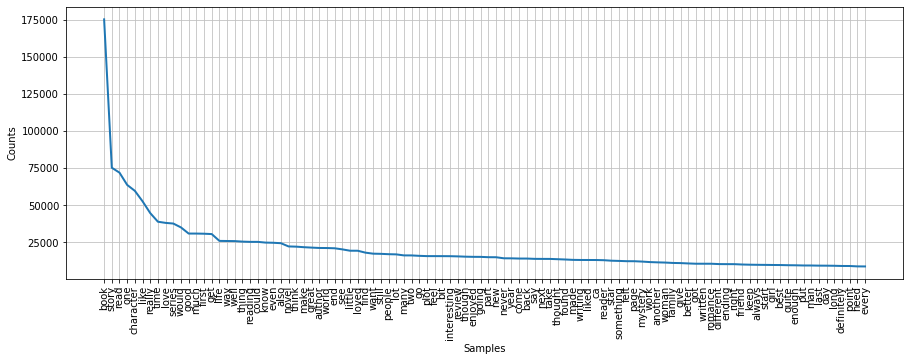

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
tokens_freq.plot(100)

In [22]:
from gensim.corpora import Dictionary

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [23]:
# build dictionary
reviews = dat["tokens"].tolist()
dictionary = Dictionary(reviews)

In [24]:
doc_frequencies = [value/100000 for value in dictionary.dfs.values()]

In [25]:
pd.Series(doc_frequencies).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01    0.000010
0.05    0.000010
0.10    0.000010
0.25    0.000010
0.50    0.000020
0.75    0.000070
0.90    0.000410
0.95    0.001230
0.99    0.009796
dtype: float64

In [26]:
pd.Series(doc_frequencies).sort_values()[::-1][:10]

29     0.66055
2      0.44871
38     0.38612
162    0.36253
36     0.33842
405    0.30218
318    0.27128
46     0.25244
223    0.23446
17     0.23162
dtype: float64

In [27]:
# remove top 4 most common words (in more than 35% of reviews)

In [28]:
pd.Series(dictionary.dfs.values()).quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

0.01      1.00
0.05      1.00
0.10      1.00
0.25      1.00
0.50      2.00
0.75      7.00
0.90     41.00
0.95    123.00
0.99    979.56
dtype: float64

In [29]:
# remove words occurring in fewer than 20 reviews

In [30]:
dictionary.filter_extremes(no_below=20,no_above=0.35)

In [31]:
len(dictionary.token2id)

14693